# Quantization of Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Requantization of a Speech Signal

The following example illustrates the requantization of a speech signal. The signal was originally recorded with a wordlength of $w=16$ bits. It is requantized with a [uniform mid-tread quantizer](linear_uniform_characteristic.ipynb#Mid-Tread-Chacteristic-Curve) to various wordlengths. The SNR is computed and a portion of the (quantized) signal is plotted. It is further possible to listen to the requantized signal and the quantization error.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

idx = 130000  # index to start plotting

def uniform_midtread_quantizer(x, w):
    # quantization step
    Q = 1/(2**(w-1))
    # limiter
    x = np.copy(x)
    idx = np.where(x <= -1)
    x[idx] = -1
    idx = np.where(x > 1 - Q)
    x[idx] = 1 - Q
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)
    
    return xQ

def evaluate_requantization(x, xQ):
    e = xQ - x
    # SNR
    SNR = 10*np.log10(np.var(x)/np.var(e))
    print('SNR: %f dB'%SNR)
    # plot signals
    plt.figure(figsize=(10, 4))
    plt.plot(x[idx:idx+100], label=r'signal $x[k]$')
    plt.plot(xQ[idx:idx+100], label=r'requantized signal $x_Q[k]$')
    plt.plot(e[idx:idx+100], label=r'quantization error $e[k]$')
    plt.xlabel(r'$k$')
    plt.legend()
    # normalize error
    e = .2 * e / np.max(np.abs(e))
    return e

# load speech sample
x, fs = sf.read('../data/speech.wav')
x = x/np.max(np.abs(x))

Original Signal
<audio src="../data/speech.wav" controls>Your browser does not support the audio element.</audio>
[../data/speech.wav](../data/speech.wav)

### Requantization to 8 bit

SNR: 34.021487 dB


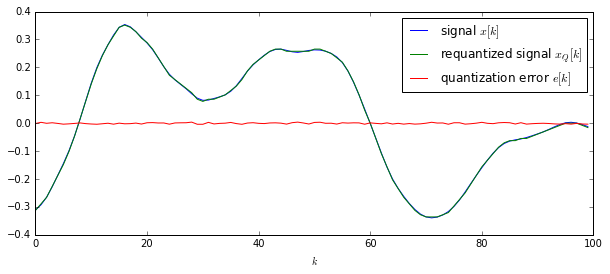

In [2]:
xQ = uniform_midtread_quantizer(x, 8)
e = evaluate_requantization(x, xQ)
sf.write('speech_8bit.wav', xQ, fs)
sf.write('speech_8bit_error.wav', e, fs)

Requantized Signal
<audio src="speech_8bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_8bit.wav](speech_8bit.wav)

Quantization Error
<audio src="speech_8bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_8bit_error.wav](speech_8bit_error.wav)

### Requantization to 6 bit

SNR: 22.889593 dB


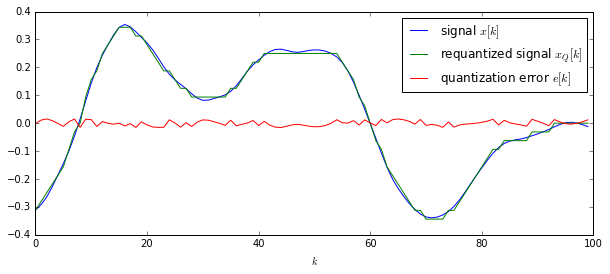

In [3]:
xQ = uniform_midtread_quantizer(x, 6)
e = evaluate_requantization(x, xQ)
sf.write('speech_6bit.wav', xQ, fs)
sf.write('speech_6bit_error.wav', e, fs)

Requantized Signal
<audio src="speech_6bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_6bit.wav](speech_6bit.wav)

Quantization Error
<audio src="speech_6bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_6bit_error.wav](speech_6bit_error.wav)

### Requantization to 4 bit

SNR: 11.713678 dB


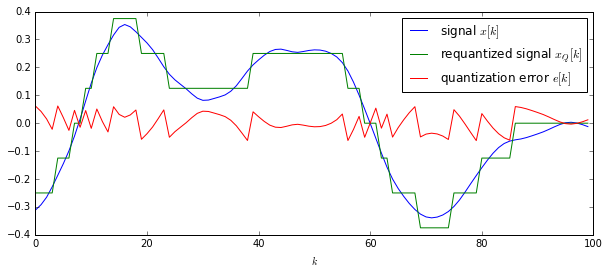

In [4]:
xQ = uniform_midtread_quantizer(x, 4)
e = evaluate_requantization(x, xQ)
sf.write('speech_4bit.wav', xQ, fs)
sf.write('speech_4bit_error.wav', e, fs)

Requantized Signal
<audio src="speech_4bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_4bit.wav](speech_4bit.wav)

Quantization Error
<audio src="speech_4bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_4bit_error.wav](speech_4bit_error.wav)

### Requantization to 2 bit

SNR: 2.428364 dB


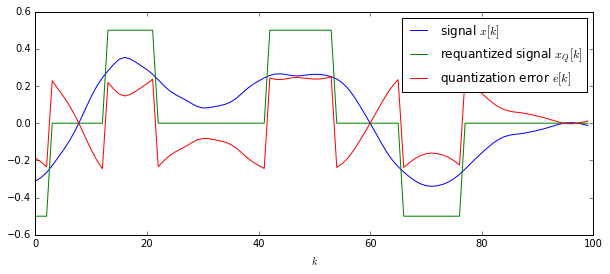

In [5]:
xQ = uniform_midtread_quantizer(x, 2)
e = evaluate_requantization(x, xQ)
sf.write('speech_2bit.wav', xQ, fs)
sf.write('speech_2bit_error.wav', e, fs)

Requantized Signal
<audio src="speech_2bit.wav" controls>Your browser does not support the audio element.</audio>
[speech_2bit.wav](speech_2bit.wav)

Quantization Error
<audio src="speech_2bit_error.wav" controls>Your browser does not support the audio element.</audio>
[speech_2bit_error.wav](speech_2bit_error.wav)

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>